In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('Cleaned_results.xlsx')
data = pd.DataFrame(data)

print(data)

            date home_team away_team  year  home  away  goal_margin
0     1879-01-18       EU1       EU3  1879     1    -1            1
1     1880-03-15       EU3       EU1  1880    -1     1            1
2     1881-02-26       EU1       EU3  1881    -1     1            1
3     1882-03-13       EU3       EU1  1882     1    -1            2
4     1883-02-03       EU1       EU3  1883     1    -1            5
...          ...       ...       ...   ...   ...   ...          ...
8760  2021-07-20       NA2       AS1  2021    -1     1            2
8761  2021-07-24       NA1       NA2  2021     1    -1            3
8762  2021-07-24       AS1       NA2  2021     1    -1            1
8763  2021-07-25       NA1       NA1  2021    -1     1            2
8764  2021-07-29       NA1       NA1  2021     1    -1            1

[8765 rows x 7 columns]


In [3]:
#sample analysis on AF2
use_AF2 = []
for k in range (len(data)):
    if data['home_team'][k] == 'AF2' and data['away_team'][k] not in ['AF1', 'AF2', 'AF3']:
        use_AF2.append(k)
for g in range (len(data)):
    if data['away_team'][g] == 'AF2' and data['home_team'][g] not in ['AF1', 'AF2', 'AF3']:
        use_AF2.append(g)
data_af2 = data.filter(items = use_AF2, axis = 0)
data_af2 = data_af2.replace(to_replace = r'^AS.$', value = 'Asia', regex = True)
data_af2 = data_af2.replace(to_replace = r'^SA.$', value = 'South_America', regex = True)
data_af2 = data_af2.replace(to_replace = r'^NA.$', value = 'North_America', regex = True)
data_af2 = data_af2.replace(to_replace = r'^EU.$', value = 'Europe', regex = True)
print(data_af2)

            date      home_team      away_team  year  home  away  goal_margin
1267  1953-11-13            AF2         Europe  1953    -1     1            1
1361  1955-12-23            AF2         Europe  1955    -1     1            4
1523  1958-12-28            AF2         Europe  1958     1    -1            1
1607  1960-04-29            AF2  South_America  1960    -1     1            5
1608  1960-05-01            AF2  South_America  1960    -1     1            2
...          ...            ...            ...   ...   ...   ...          ...
8452  2018-11-20  South_America            AF2  2018     1    -1            1
8557  2019-09-05           Asia            AF2  2019     0     0            0
8616  2020-10-08         Europe            AF2  2020     0     0            0
8621  2020-10-09           Asia            AF2  2020     0     0            0
8637  2020-10-13           Asia            AF2  2020     1    -1            1

[223 rows x 7 columns]


In [4]:
af = []
opponent = []
match_status = []
for x in range (len(data_af2)):
    af.append('AF2')
    if np.array(data_af2['home_team'])[x] == 'AF2':
        opponent.append(np.array(data_af2['away_team'])[x])
        match_status.append(np.array(data_af2['home'])[x])
    else:
        opponent.append(np.array(data_af2['home_team'])[x])
        match_status.append(np.array(data_af2['away'])[x])
        
af2 = pd.DataFrame(data = {'africa_tier2' : af, 'opponent' : opponent, 'match_status' : match_status, 'goal_margin' : np.array(data_af2['goal_margin']), 'year' : np.array(data_af2['year'])})

print(af2)

    africa_tier2       opponent  match_status  goal_margin  year
0            AF2         Europe            -1            1  1953
1            AF2         Europe            -1            4  1955
2            AF2         Europe             1            1  1958
3            AF2  South_America            -1            5  1960
4            AF2  South_America            -1            2  1960
..           ...            ...           ...          ...   ...
218          AF2  South_America            -1            1  2018
219          AF2           Asia             0            0  2019
220          AF2         Europe             0            0  2020
221          AF2           Asia             0            0  2020
222          AF2           Asia            -1            1  2020

[223 rows x 5 columns]


In [5]:
#making sub-data-frame wrt opponent's region
af2_asia = []
af2_north_america =[]
af2_south_america =[]
af2_europe = []

for y in range (len(af2)):
    if opponent[y] == 'Asia':
        af2_asia.append(y)
    elif opponent[y] == 'North_America':
        af2_north_america.append(y)
    elif opponent[y] == 'South_America':
        af2_south_america.append(y)
    if opponent[y] == 'Europe':
        af2_europe.append(y)
#verifying
print(len(af2_europe) + len(af2_asia) + len(af2_south_america) + len(af2_north_america) )

223


In [6]:
#af2_vs_asia 
af2_vs_asia = af2.filter(items = af2_asia, axis = 0)

#af2_vs_north_america 
af2_vs_north_america = af2.filter(items = af2_north_america, axis = 0)

#af2_vs_south_america 
af2_vs_south_america = af2.filter(items = af2_south_america, axis = 0)

#af2_vs_europe 
af2_vs_europe = af2.filter(items = af2_europe, axis = 0)

af2_vs_asia.to_excel("Af_Tier2_vs_Asia.xlsx", index = False)
af2_vs_north_america.to_excel("Af_Tier2_vs_North_America.xlsx", index = False)
af2_vs_south_america.to_excel("Af_Tier2_vs_South_America.xlsx", index = False)
af2_vs_europe.to_excel("Af_Tier2_vs_Europe.xlsx", index = False)

    africa_tier2 opponent  match_status  goal_margin  year
0            AF2   Europe            -1            1  1953
1            AF2   Europe            -1            4  1955
2            AF2   Europe             1            1  1958
10           AF2   Europe             1            1  1983
16           AF2   Europe            -1            4  1986
..           ...      ...           ...          ...   ...
210          AF2   Europe            -1            5  2017
211          AF2   Europe            -1            2  2017
214          AF2   Europe            -1            1  2018
216          AF2   Europe            -1            3  2018
220          AF2   Europe             0            0  2020

[83 rows x 5 columns]


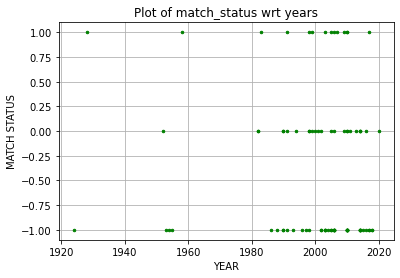

Text(0.5, 1.0, 'Histogram of match_status')

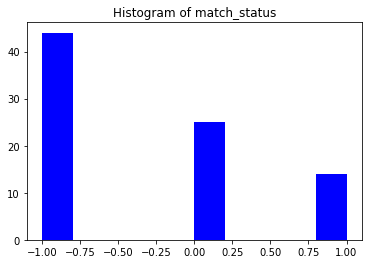

In [7]:
#checking
print(af2_vs_europe)

#plot af1_vs_europe
plt.plot(af2_vs_europe['year'], af2_vs_europe['match_status'], 'o-', ms = 2.5, color = 'green', linestyle = '')
plt.xlabel('YEAR')
plt.ylabel('MATCH STATUS')
plt.title('Plot of match_status wrt years')
plt.grid(True)
plt.show()

plt.hist(af2_vs_europe['match_status'], color = 'blue')
plt.title('Histogram of match_status')